In [2]:
%matplotlib inline
import main
import spark_greedy
import matplotlib.pyplot as plt
import random
import math
import time
from functools import partial


#VM bs
#import findspark
#findspark.init()

from pyspark import SparkContext

In [3]:
sc = SparkContext("local", "test_run")

In [46]:
def node_swap(total_nodes,current_nodes,swap_number):
    new_nodes = set(random.sample(total_nodes.difference(current_nodes),swap_number))
    kept_nodes = set(random.sample(current_nodes,len(current_nodes) - swap_number))
    return new_nodes | kept_nodes

def imp_mcmc(graph,k,N_tot,iterations,y=spark_greedy.spark_trials):
    
    
    # graph broadcast
    g = sc.broadcast(graph)
    
    # partitions
    parts = 4
    
    # rdd
    rdd = sc.parallelize(range(0,parts))
    
    # iteration variables
    i = 0
    j = 0
    
    # annealing parameters
    T = 1
    a = 0.9
    depth = 10
    N = N_tot/parts
    swap = 1
    
    f = partial(y,rdd)
    
    all_nodes = set(graph.nodes())
    nodes = set(random.sample(all_nodes,k))
    
    # Here E = activated nodes, we want to find max E (NOT min E)
    E1 = f(N,nodes,g.value,depth)['mean']
    max_E = E1
    temp_max_E = E1
    max_nodes = nodes
    temp_max_nodes = nodes
    accepted = []
    chain = 0

    while i < iterations:

        if j > 49:
            T = T*a
            j = 0

        if chain > 5000:
            #N += 1
            T = 1
            chain = 0
            nodes = set(random.sample(all_nodes,k))
            E1 = f(N, nodes, g.value, depth)['mean']
            temp_max_E = E1
            temp_max_nodes = nodes
            print "chain reset"

        new_nodes = node_swap(all_nodes,nodes,swap)
        E2 = f(N, new_nodes, g.value, depth)['mean']
        
        u = random.uniform(0,1)
        
        # Boltzman distribution
        if u <= math.exp((math.log(E2) - math.log(E1))/T):
            
            if E2 > max_E:
                max_E = E2
                max_nodes = new_nodes
                
            if E2 < temp_max_E:
                temp_max_E = E2
                chain = 0

            j += 1
            nodes = new_nodes
            E1 = E2

        else:
            chain += 1

        accepted.append(E1)
        i += 1

    plt.plot(accepted)
    print max_nodes
    print max_E


In [39]:
NC_digraph = main.import_graph("nc_mini.json")
print 'ok'

ok


updated 3!
set([u'A6bPFcUjuuayRBoyybedDQ', u'gPKODEBXFwuweW74DLjWjw'])
26.4140625
6.99300003052


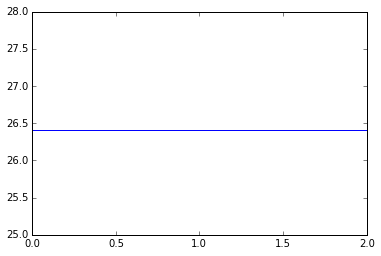

In [37]:
start = time.time()
imp_mcmc(NC_digraph,2,2)

print time.time() - start

In [29]:
NC_digraph_full = main.import_graph("nc_full.json")

updated 3!
set([u'TQxU-uhfw21R_O2MiB4OkQ', u'Hg4GF6sHT_9tuHIvrfpkpw'])
8968.015625
358.419000149


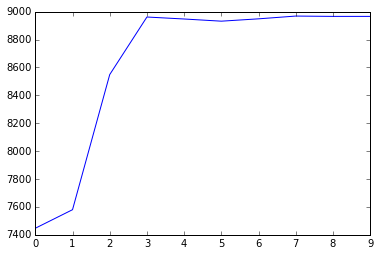

In [40]:
start = time.time()
imp_mcmc(NC_digraph_full,2,10)

print time.time() - start

In [ ]:
# 30 seconds per markov chain step:
# 1 hour = 60 step
# 1 day = 1440 steps

updated 3!
set([u'jUjHe3Zjcpccx3qsrkV9eA', u'hznWedT98PZn5DFQR5ZI_Q', u'8b0hrkKVi0u5dgQZ0bYe1Q'])
8955.84375
k = 3: time =552.065999985
updated 3!
set([u'yS1T2lhZKn48sWcL9Q1OFQ', u'Nkvorg0vmBSQL9mcSC0XiQ', u'Grkzg-ncOPBInyjNCNfluA', u'96Vpd7QpqErcBaqPMl0Fbw'])
8959.03125
k = 4: time =574.205999851
updated 3!
set([u'CFTtaXMvqQ2vCo8lRD3H1A', u'HzH2dW8ZXynAMBv5oMyiww', u'Fo438fAEj4QxFSObm38u7w', u't5mr9snU8tI7hcjMSCYxLQ', u'yaeBhooTaPXFBU8o21vudA'])
8967.3515625
k = 5: time =688.246999979


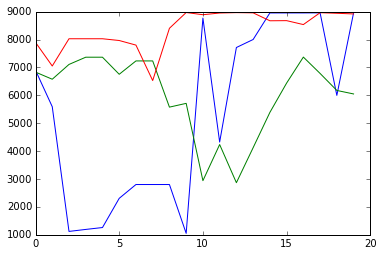

In [43]:
start = time.time()
imp_mcmc(NC_digraph_full,3,64,20)

print 'k = 3: time =' + str(time.time() - start)

start = time.time()
imp_mcmc(NC_digraph_full,4,64,20)

print 'k = 4: time =' + str(time.time() - start)

start = time.time()
imp_mcmc(NC_digraph_full,5,64,20)

print 'k = 5: time =' + str(time.time() - start)

In [44]:
len(NC_digraph_full.nodes())

24224

set([u'QxVV5XAQd3S3GI-4qk6sJg', u'zlgk856vrBx3wSorYHw_3w', u'sfrumTeq5CyNSOCF3o7UCg'])
8969.76171875
k = 4: time =949.352999926
set([u'h_v04iVk5A8pNFnje8iiDw', u'ZrDA_FCLIvz6w813BMG-gw', u'45uO-k9s7muj_l6GIRWlHA'])
8961.97265625
k = 5: time =2156.34700012


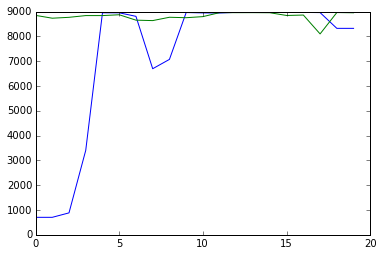

In [47]:
start = time.time()
imp_mcmc(NC_digraph_full,3,128,20)

print 'k = 4: time =' + str(time.time() - start)



start = time.time()
imp_mcmc(NC_digraph_full,3,256,20)

print 'k = 5: time =' + str(time.time() - start)

set([u'irgp7zoz5-wHG4DklEhzBw', u'Axjahugoqcfr6GTidue9cA', u'Fc8NYfCU59hFEyr59AA1BA', u'j-fQR6bLlELfTWtKple3LQ', u'Dxgd2ClL4N1HNjo1DEEmDw'])
8978.0625
k = 4: time =3291.48699999


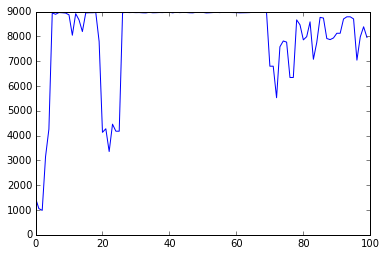

In [48]:
start = time.time()
imp_mcmc(NC_digraph_full,5,64,100)

print 'k = 4: time =' + str(time.time() - start)

In [14]:
sc.parallelize(range(0,8),32).getNumPartitions()

32

In [24]:
start = time.time()
rdd = sc.parallelize(range(0,2),2)
x = [random.choice(NC_digraph.nodes())]
spark_greedy.spark_trials(rdd,2**13,x,NC_digraph)
print time.time() - start

7.08270215988


In [25]:
start = time.time()
rdd = sc.parallelize(range(0,4),4)
spark_greedy.spark_trials(rdd,2**12,x,NC_digraph)
print time.time() - start

6.13872289658


In [49]:
main.cascade_trials(100,set([u'irgp7zoz5-wHG4DklEhzBw', u'Axjahugoqcfr6GTidue9cA', u'Fc8NYfCU59hFEyr59AA1BA', u'j-fQR6bLlELfTWtKple3LQ', u'Dxgd2ClL4N1HNjo1DEEmDw']),NC_digraph_full)

{'mean': 8975.8700000000008,
 'std': 42.338553352706796,
 'time': 38.37100005149841}